### Import Packages

In [24]:
# import the necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
#from tqdm import tqdm
from ast import literal_eval
import warnings
warnings.filterwarnings('ignore')

### Data Collection

In [25]:
# load the dataset
df = pd.read_excel('Dataset.xlsx')

### Exploratory Data Analysis

In [26]:
# preview data
df.head(5)

,CustomerID,Name,Age,Gender,Location,Email,Phone,Address,Segment,PurchaseHistory,...,ServiceInteractions,PaymentHistory,WebsiteUsage,ClickstreamData,EngagementMetrics,Feedback,MarketingCommunication,NPS,ChurnLabel,Timestamp
0,1001,Mark Barrett,31,Male,Andrewfort,allison74@example.net,3192528777,"61234 Shelley Heights Suite 467\nCohentown, GU...",Segment B,"[{'Product': 'Frozen Cocktail Mixes', 'Frequen...",...,"[{'Type': 'Call', 'Date': '2019-09-26'}, {'Typ...","[{'Method': 'Credit Card', 'Late_Payments': 5}...","{'PageViews': 49, 'TimeSpent(minutes)': 15}","[{'Action': 'Add to Cart', 'Page': 'register',...","{'Logins': 19, 'Frequency': 'Weekly'}","{'Rating': 1, 'Comment': 'I move baby go small...","[{'Email_Sent': '2019-10-17', 'Email_Opened': ...",3,1,2020-01-27 01:36:49
1,1002,Jeremy Welch,66,Female,Millerhaven,fmiller@example.com,231-587-1818x8651,"4959 Jennifer Junction\nNew Angelaport, TN 87397",Segment C,"[{'Product': 'Watercraft Polishes', 'Frequency...",...,"[{'Type': 'Call', 'Date': '2020-01-05'}, {'Typ...","[{'Method': 'Credit Card', 'Late_Payments': 3}...","{'PageViews': 100, 'TimeSpent(minutes)': 9}","[{'Action': 'Add to Cart', 'Page': 'homepage',...","{'Logins': 9, 'Frequency': 'Weekly'}","{'Rating': 2, 'Comment': 'Wish what bag cut li...","[{'Email_Sent': '2021-08-02', 'Email_Opened': ...",6,0,2019-01-06 18:30:03
2,1003,Brandon Patel,36,Female,Lozanostad,jasonbrown@example.org,(270)633-9095,"38701 Amanda Brook Apt. 076\nKimshire, NJ 62516",Segment B,"[{'Product': 'Vehicle Waxes, Polishes & Protec...",...,"[{'Type': 'Email', 'Date': '2019-10-09'}, {'Ty...","[{'Method': 'Credit Card', 'Late_Payments': 1}...","{'PageViews': 1, 'TimeSpent(minutes)': 97}","[{'Action': 'Search', 'Page': 'terms', 'Timest...","{'Logins': 19, 'Frequency': 'Monthly'}","{'Rating': 4, 'Comment': 'Some Democrat guess ...","[{'Email_Sent': '2021-08-29', 'Email_Opened': ...",3,0,2019-04-30 04:25:10
3,1004,Tina Martin,62,Female,South Dustin,matthew62@example.net,050.081.8706x11982,"67324 Ashley Coves\nSouth John, RI 29650",Segment C,"[{'Product': 'Mouthwash', 'Frequency': 5, 'Val...",...,"[{'Type': 'Call', 'Date': '2020-08-28'}, {'Typ...","[{'Method': 'Credit Card', 'Late_Payments': 36...","{'PageViews': 25, 'TimeSpent(minutes)': 31}","[{'Action': 'Click', 'Page': 'privacy', 'Times...","{'Logins': 4, 'Frequency': 'Daily'}","{'Rating': 1, 'Comment': 'Yard feel never miss...","[{'Email_Sent': '2021-02-03', 'Email_Opened': ...",1,1,2020-03-03 17:33:28
4,1005,Christopher Rodriguez,68,Female,West James,shannonstrickland@example.org,+1-701-854-4915x724,"01169 Miller Mission\nWest Anthonyburgh, WY 47359",Segment C,"[{'Product': 'Ice Cream Novelties', 'Frequency...",...,"[{'Type': 'Call', 'Date': '2019-04-10'}, {'Typ...","[{'Method': 'Credit Card', 'Late_Payments': 0}...","{'PageViews': 77, 'TimeSpent(minutes)': 51}","[{'Action': 'Click', 'Page': 'privacy', 'Times...","{'Logins': 12, 'Frequency': 'Weekly'}","{'Rating': 3, 'Comment': 'Ten determine unit i...","[{'Email_Sent': '2022-03-11', 'Email_Opened': ...",3,0,2019-04-05 22:42:22


In [27]:
# check for null values
df.isnull().sum()

CustomerID                0
Name                      0
Age                       0
Gender                    0
Location                  0
Email                     0
Phone                     0
Address                   0
Segment                   0
PurchaseHistory           0
SubscriptionDetails       0
ServiceInteractions       0
PaymentHistory            0
WebsiteUsage              0
ClickstreamData           0
EngagementMetrics         0
Feedback                  0
MarketingCommunication    0
NPS                       0
ChurnLabel                0
Timestamp                 0
dtype: int64

In [28]:
# check for duplicates
dup = df.duplicated().sum()
print(f'This dataset has',dup,'duplicates')

This dataset has 0 duplicates


In [29]:
df.shape

(12483, 21)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12483 entries, 0 to 12482
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              12483 non-null  int64 
 1   Name                    12483 non-null  object
 2   Age                     12483 non-null  int64 
 3   Gender                  12483 non-null  object
 4   Location                12483 non-null  object
 5   Email                   12483 non-null  object
 6   Phone                   12483 non-null  object
 7   Address                 12483 non-null  object
 8   Segment                 12483 non-null  object
 9   PurchaseHistory         12483 non-null  object
 10  SubscriptionDetails     12483 non-null  object
 11  ServiceInteractions     12483 non-null  object
 12  PaymentHistory          12483 non-null  object
 13  WebsiteUsage            12483 non-null  object
 14  ClickstreamData         12483 non-null  object
 15  En

In [31]:
# check statistical overview of colums
stats = df.describe()

stats

,CustomerID,Age,NPS,ChurnLabel
count,12483.00000,12483.000000,12483.000000,12483.000000
mean,7242.00000,43.930065,2.973884,0.505808
std,3603.67604,15.341521,2.644623,0.499986
min,1001.00000,18.000000,0.000000,0.000000
25%,4121.50000,31.000000,1.000000,0.000000
50%,7242.00000,44.000000,2.000000,1.000000
75%,10362.50000,57.000000,4.000000,1.000000
max,13483.00000,70.000000,9.000000,1.000000


# Univariate Analysis

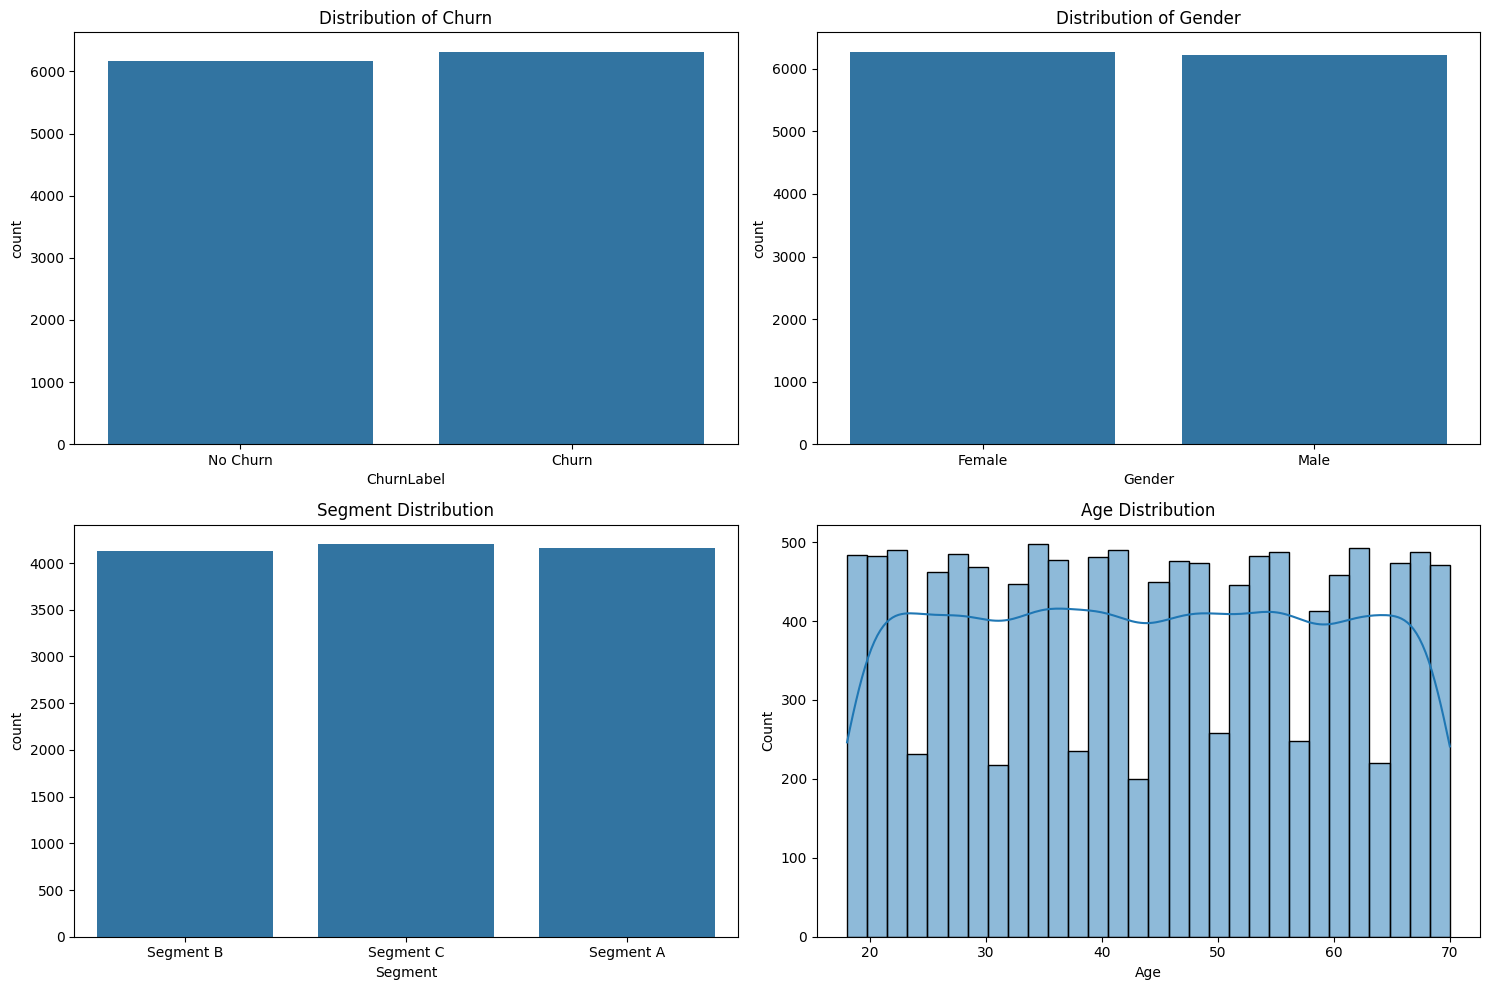

In [32]:
fig,ax =plt.subplots(2,2, figsize=(15,10))
    
# Plot Churnlabel Distribution
sns.countplot(data=df, x='ChurnLabel', ax=ax[0,0])
ax[0,0].set_title('Distribution of Churn')
ax[0,0].set_xticklabels(['No Churn', 'Churn'])

# Plot the Distribution of Gender
sns.countplot(data=df, x='Gender', ax=ax[0,1])
ax[0,1].set_title('Distribution of Gender')
ax[0,1].set_xticklabels(['Female','Male'])

# Plot Segment Distribution
sns.countplot(data=df , x='Segment', ax=ax[1,0])
ax[1,0].set_title('Segment Distribution')
# ax[1,0].set_xticklabels([])

# Plot segment distribution
sns.histplot(df['Age'], bins=30,ax=ax[1,1], kde=True)
ax[1,1].set_title('Age Distribution')

plt.tight_layout()
plt.show()
    

<function matplotlib.pyplot.show(close=None, block=None)>

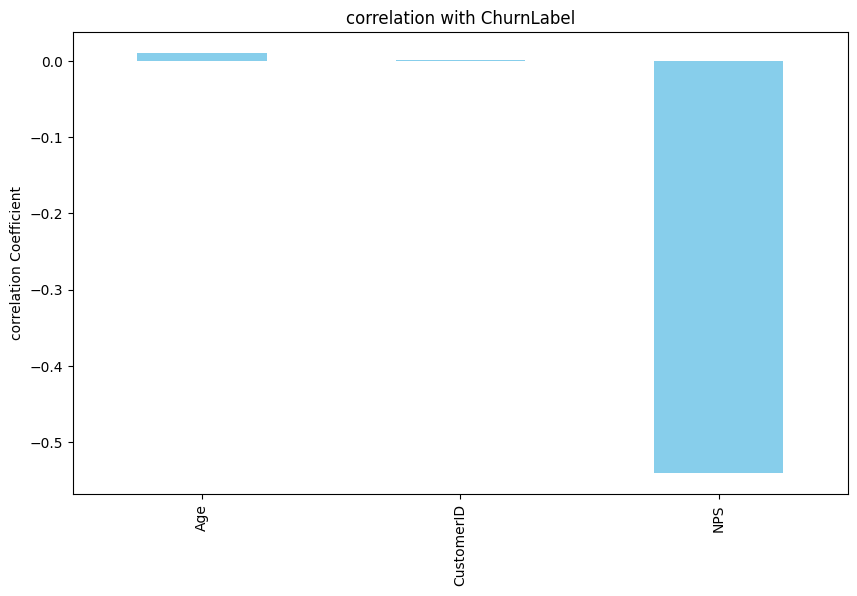

In [33]:
# calculate the correlation with ChurnLabel
correlation = df.select_dtypes(include=np.number).corr()['ChurnLabel'].sort_values(ascending=False)

# Plot the correlation
plt.figure(figsize=(10,6))
correlation.drop('ChurnLabel').plot(kind='bar', color='skyblue')
plt.title('correlation with ChurnLabel')
plt.ylabel('correlation Coefficient')
plt.show

In [34]:
# List nested columns
nested_columns = [          
    'PurchaseHistory',
    'SubscriptionDetails', 
    'ServiceInteractions',       
    'PaymentHistory',            
    'WebsiteUsage',              
    'ClickstreamData',           
    'EngagementMetrics',         
    'Feedback',                  
    'MarketingCommunication'        
]

In [35]:
w1, w2 = 25,1000
for col in nested_columns:
    row = [col, df[col][0]]
print('\n| {:<{w1}} | {:<{w2}} |'.format(*row, w1=w1, w2=w2))


| MarketingCommunication    | [{'Email_Sent': '2019-10-17', 'Email_Opened': '2022-01-12', 'Email_Clicked': '2022-11-27'}, {'Email_Sent': '2019-10-17', 'Email_Opened': '2022-01-12', 'Email_Clicked': '2022-11-27'}, {'Email_Sent': '2019-10-17', 'Email_Opened': '2022-01-12', 'Email_Clicked': '2022-11-27'}, {'Email_Sent': '2019-10-17', 'Email_Opened': '2022-01-12', 'Email_Clicked': '2022-11-27'}, {'Email_Sent': '2019-10-17', 'Email_Opened': '2022-01-12', 'Email_Clicked': '2022-11-27'}, {'Email_Sent': '2019-10-17', 'Email_Opened': '2022-01-12', 'Email_Clicked': '2022-11-27'}, {'Email_Sent': '2019-10-17', 'Email_Opened': '2022-01-12', 'Email_Clicked': '2022-11-27'}, {'Email_Sent': '2019-10-17', 'Email_Opened': '2022-01-12', 'Email_Clicked': '2022-11-27'}]                                                                                                                                                                                                                                                 

In [36]:
# Apply literal_eval function
for columns in nested_columns:
    df[columns] = df[columns].apply(literal_eval)

### Extract features from nested columns

In [37]:
# PurchaseHistory
df['PurchaseProduct'] = df['PurchaseHistory'].apply(lambda x : '|'.join([i['Product'] for i in x]))
df['PurchaseFrequency'] = df['PurchaseHistory'].apply(lambda x : sum([i['Frequency'] for i in x]))
df['PurchaseValue'] = df['PurchaseHistory'].apply(lambda x : sum([i['Value'] for i in x]))

# SubscriptionDatails
df['SubscriptionPlan'] = df['SubscriptionDetails'].apply(lambda x: x['Plan'] )
df['SubscriptionStartDate'] = df['SubscriptionDetails'].apply(lambda x: x['Start_Date'] )
df['SubscriptionEndtDate'] = df['SubscriptionDetails'].apply(lambda x: x['End_Date'] )
df['SubscriptionDuration'] = (pd.to_datetime(df['SubscriptionEndtDate']) - pd.to_datetime(df['SubscriptionStartDate'])).dt.days

# WebsiteUsage
df['WebsitePageViews'] = df['WebsiteUsage'].apply(lambda x: x['PageViews'])
df['WebsiteTimeSpent'] = df['WebsiteUsage'].apply(lambda x: x['TimeSpent(minutes)'])

# EngagementMetrics
df['EngagementMetricsLogin'] = df['EngagementMetrics'].apply(lambda x: x['Logins'])
df['EngagementMetricsFrequency'] = df['EngagementMetrics'].apply(lambda x: x['Frequency'])

# Feedback
df['FeedbackRating'] = df['Feedback'].apply(lambda x: x['Rating'])
df['FeedbackComment'] = df['Feedback'].apply(lambda x: x['Comment'])

# MarketingCommunication
df['MarketingCommunicationEmails'] = df['MarketingCommunication'].apply(lambda x: len(x))
df['MarketingCommunicationOpenClickDiff'] = df['MarketingCommunication'].apply(lambda x: np.mean([
    (pd.to_datetime(i['Email_Clicked']) - pd.to_datetime(i['Email_Opened'])).days for i in x
]) )

df['MarketingCommunicationSentOpenDiff'] = df['MarketingCommunication'].apply(lambda x: np.mean([
    (pd.to_datetime(i['Email_Opened']) - pd.to_datetime(i['Email_Sent'])).days for i in x
]))

In [38]:
# Get all unique ServiceInteraction Types
Service_Interaction_Types = df['ServiceInteractions'].apply(lambda x: list(set(i['Type'] for i in x)))
Service_Interaction_Types = Service_Interaction_Types.to_list()
Uniques_Service_Interaction_Type = []

for i in Service_Interaction_Types:
    Uniques_Service_Interaction_Type.extend(i)
Uniques_Service_Interaction_Type = list(set(Uniques_Service_Interaction_Type))
print('Service Interaction Types', Uniques_Service_Interaction_Type)

Service Interaction Types ['Call', 'Chat', 'Email']


In [43]:
# Get all Unique Payment Method
Payment_History_Method = df['PaymentHistory'].apply(lambda x: list(set(i['Method'] for i in x)))
Payment_History_Method = Payment_History_Method.to_list()
Unique_Payment_Method = []
for method in Payment_History_Method:
    Unique_Payment_Method.extend(method)
Unique_Payment_Method = list(set(Unique_Payment_Method))
print('Payment Methods', Unique_Payment_Method)

Payment Methods ['Bank Transfer', 'Credit Card', 'PayPal']


In [44]:
# Get all unique ClickStreamData Action
action = df['ClickstreamData'].apply(lambda x: list(set(i['Action'] for i in x)))
action = action.to_list()
Unique_Action = []
for i in action:
    Unique_Action.extend(i)
Unique_Action = list(set(Unique_Action))
print('Unique Actions', Unique_Action)

Unique Actions ['Click', 'Search', 'Add to Cart']


Create new columns

In [45]:
# Service Interaction
for s in Uniques_Service_Interaction_Type:
    df[f'Service_Interactin_{s}'] = df['ServiceInteractions'].apply(lambda x: len([i for i in x if i['Type']==s]))
    
# Payment History
 

In [40]:
df['Segment'].unique()

array(['Segment B', 'Segment C', 'Segment A'], dtype=object)

In [41]:
df['Segment'] = df['Segment'].str.replace('Segment','').str.strip()

df['Segment'].unique()

array(['B', 'C', 'A'], dtype=object)

In [42]:
df['EngagementMetrics'].unique()

TypeError: unhashable type: 'dict'

In [18]:
df['NPS'].unique()

array([3, 6, 1, 2, 5, 0, 8, 7, 4, 9])